### Notebook for concept presence analysis

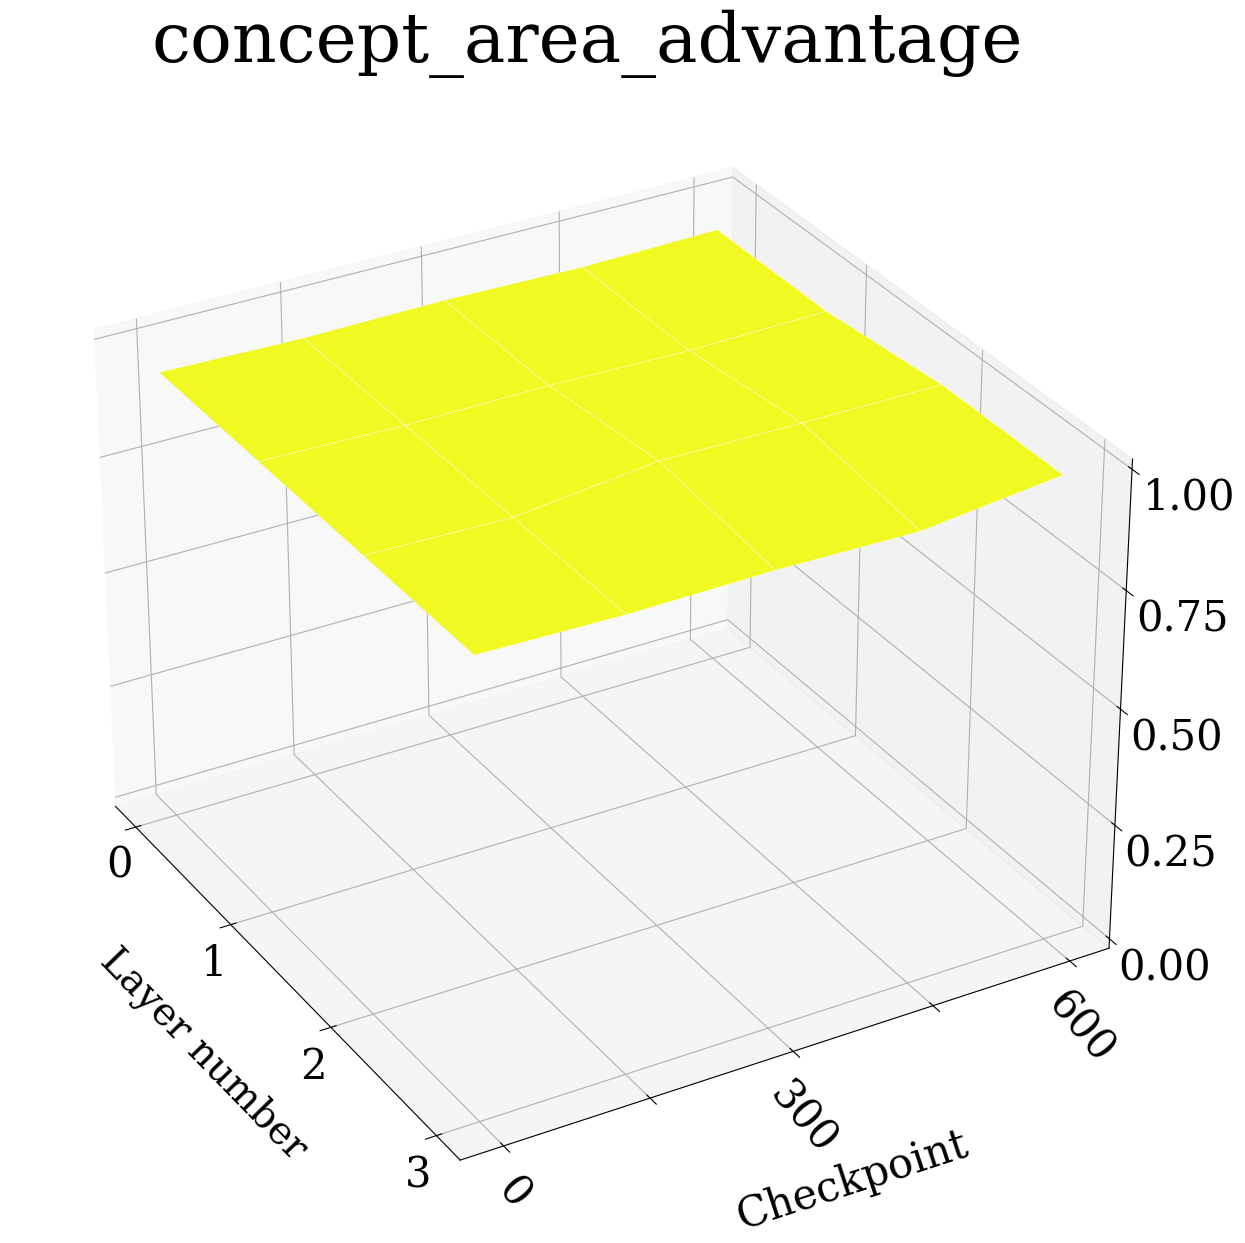

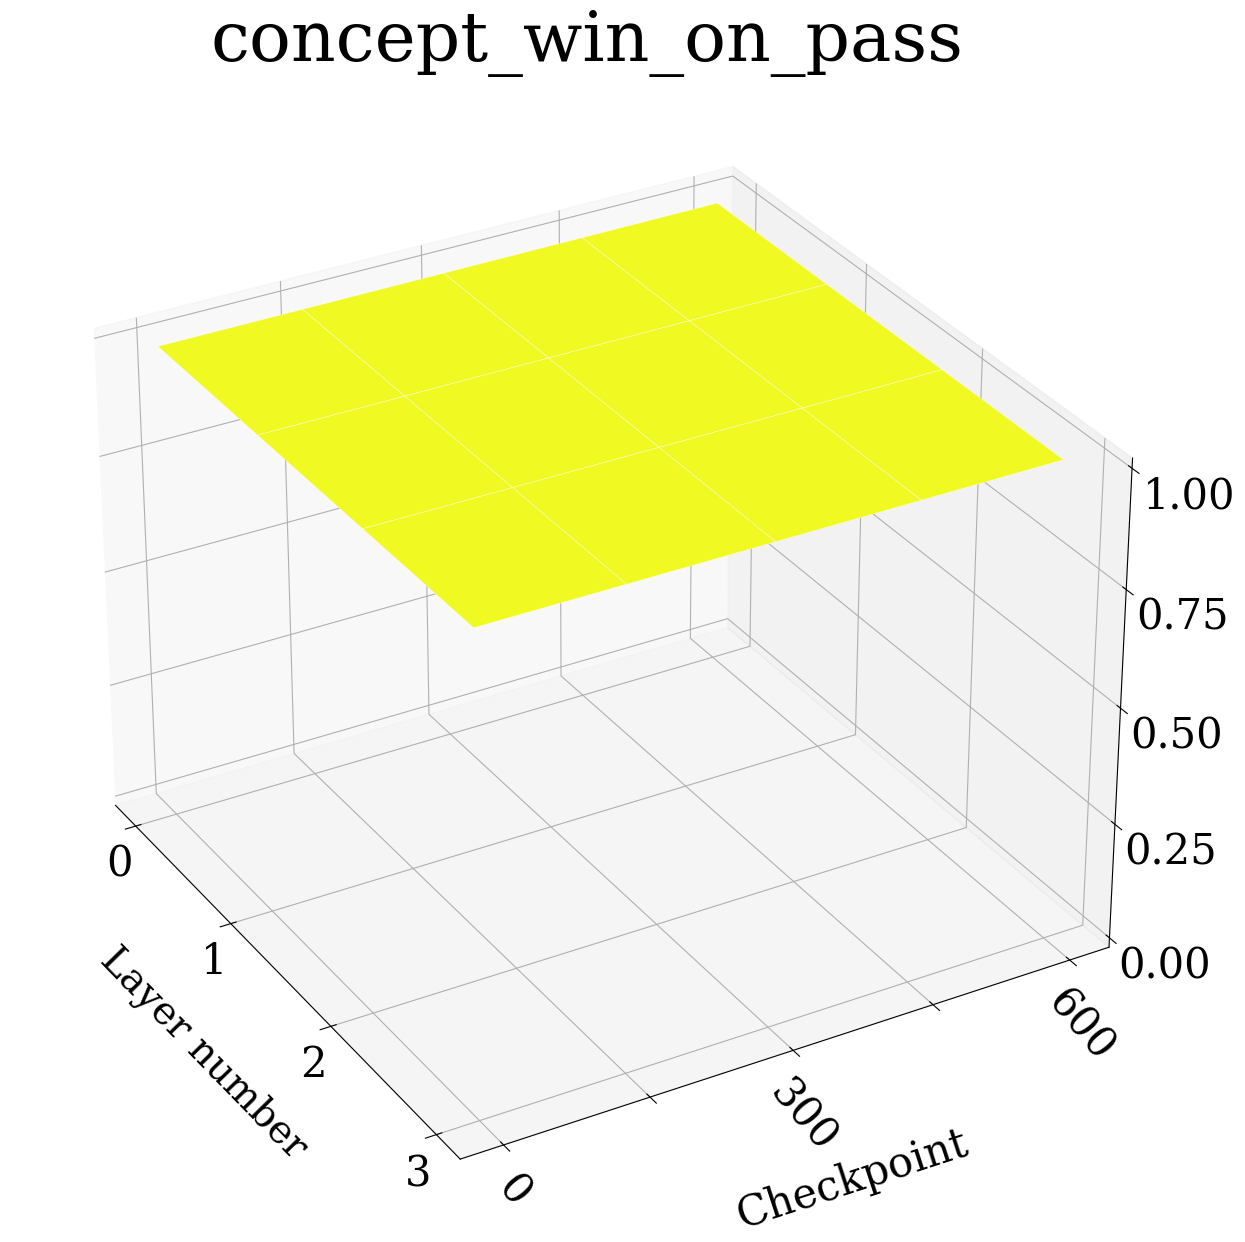

In [1]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import json

sys.path.append(os.path.abspath(os.path.join(os.path.pardir, 'src')))

model_name = 'net'
board_name = '5x5'

levels = [0, 150, 300, 450, 600]

concepts = ['concept_area_advantage', 'concept_win_on_pass']

for concept in concepts:
    z = []

    for level in levels:
        presences = []
        for file in os.listdir("../concept_presences/{}/{}/{}/{}".format(board_name, model_name, concept, level)):
            with open(os.path.join("../concept_presences/{}/{}/{}/{}".format(board_name, model_name, concept, level), file)) as f:
                data = json.load(f)
                presences.append(data)
        
        y = []

        for (i, presence) in enumerate(presences):
            y = []
            for j, ind_presence in enumerate(presence):
                y.append(ind_presence)
            z.append(y)
    z = np.array(z)

    mpl.style.use("seaborn-v0_8-muted")
    mpl.rcParams['figure.figsize'] = (15, 15)
    mpl.rcParams['lines.linewidth'] = 10.0

    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams["axes.axisbelow"] = True
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Make data.
    X = np.arange(len(levels))
    Y = np.arange(z.shape[1])
    X, Y = np.meshgrid(Y, X)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, z, cmap=cm.plasma, edgecolor="white", linewidth=0.25, vmin=0.1, vmax=0.9)
    # Customize the z axis.
    ax.set_zlim(0, 1.00)
    ax.set_axisbelow(False)
    ax.set_title(concept, fontsize=50, pad=-20)
    ax.set_xlabel("Layer number", labelpad=30, fontsize=28, zorder=10)
    ax.set_ylabel("Checkpoint", labelpad=45,fontsize=30,zorder=10)
    plt.xticks(fontsize=30, rotation=0)
    plt.xticks(np.arange(z.shape[1]))
    plt.yticks(fontsize=30, rotation=-50)
    ax.tick_params('z', labelsize=30, pad=15, reset=True)
    fig.patch.set_facecolor("white")

    ax.zaxis.set_major_locator(LinearLocator(5))

    labels = levels.copy()
    labels[0] = 0
    plt.yticks(np.arange(len(levels)), labels)
    yticks = ax.yaxis.get_major_ticks()
    for i in range(1, len(labels), 2):
        yticks[i].label1.set_visible(False)

    yticks[-1].label1.set_visible(True)
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
    ax.view_init(30, -30)

    os.makedirs("plots/{}/{}".format(board_name, model_name), exist_ok=True)
    plt.savefig("plots/{}/{}/{}.png".format(board_name, model_name, concept), transparent=False)